# FPGA Based Processor Design

This colab notebook includes various pyhton script that was used during the process of implementing the FPGA Based Processor.

###  Group members

|Name|Index|
|:----|:---|
|Kumarasinghe H.A.N.H | 180337M|
|Mendis N.P.A. | 180398A|
|Nagasinghe K.R.Y. | 180411K|
|Thalagala B.P. |180631J|






## Python Script to Generate the binary values of an image to feed into Vivado Sumulator

* In this script OpenCV was used **only to open** a given image.
* However, due the massive size of such image (256*256), a dummy image was used inside the implemented processor to verify its operation.

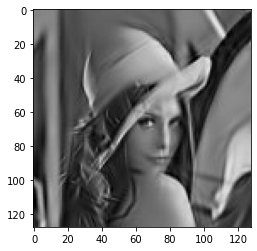

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# read and display the image
file = '/lenna.jpg' 
image = cv.imread(file, cv.IMREAD_GRAYSCALE)
fig, ax = plt.subplots()
ax.imshow(image, cmap='gray', vmin = 0, vmax = 255)
plt.show()

In [ ]:
# write the binary representation of the image pixels to a txt file to replace data in Ram.v
ram_index = 20 # we will be storing the image starting from the address 20 in our Data RAM
with open('/'+file.split('.')[0] + '.txt', 'w') as imgfile:    
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            # print(image[row, col])
            imgfile.write("ram[{}] = 8'b{:08b};\n".format(ram_index, image[row, col]))
            ram_index += 1


## Downsampling the original image using the algorithms implemented by the team

Reading the image...
Horizontal Convolution...
Vertical Convolution...
Downsampling...
Visualizing...


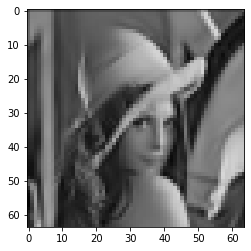

In [27]:
# downsampling using the python algorithm implemented by team

# reading the image
print("Reading the image...")
file = '/lenna.jpg' 
image = cv.imread(file, cv.IMREAD_GRAYSCALE)

# converting to a 1D array
image = image.flatten()

# properties of the original image
image_width  = 128; # width of the image
image_height = 128; # height of the image

# properties of the downsampled image
dsimage_width  = 64; # width of the downsampled image
dsimage_height = 64; # height of the downsampled image

# downsampled image
downsampledimage = [0] * dsimage_width * dsimage_height; # variable to store downsampled image

# Horizontal Convolution
print("Horizontal Convolution...")
height_count = image_height;    
x = 0
while (height_count > 0):
        y = 0
        a = 0 # zero padding(left)
        b = 2 * image[x*image_width + y]
        width_count = image_width - 1

        while (width_count > 0):
                c = image[x*image_width + y + 1]
                new_pixel = (a + b + c)/4
                image[x*image_width + y] = (new_pixel);                 
                # sliding window
                a = b/2
                b = c*2
                y += 1; # moving to next pixel
                width_count -= 1
          
        c = 0; # zero padding(right)
        new_pixel = (a + b + c)/4
        image[x*image_width + y] = (new_pixel)      
        x += 1; # moving to next row
        height_count -= 1



# Vertical Convolution
print("Vertical Convolution...")
width_count = image_width
y = 0
while (width_count > 0):
        x = 0
        a = 0 # zero padding(top)
        b = 2*image[x*image_width + y]
        height_count = image_height - 1

        while (height_count > 0):
                c = image[x*image_width + image_width + y]
                new_pixel = (a + b + c)/4
                image[x*image_width + y] = (new_pixel)                
                # sliding window
                a = b/2
                b = c*2
                x += 1 # moving to next pixel
                height_count -= 1;       

        c = 0 # zero padding(bottom)
        new_pixel = (a + b + c)/4
        image[x*image_width + y] = (new_pixel)
        y += 1 #  moving to next column
        width_count -= 1
        # print("")


#  downsampling
print("Downsampling...")
height_count = image_height/2 #  dsimage_height;
x = 0
while (height_count > 0):  
        y = 0
        width_count = image_width/2; #  dsimage_width

        while (width_count > 0):
                pixel_value = image[2 * (y*image_width + x)]
                downsampledimage[int(x* (image_width/2) + y)] = (pixel_value)                            
                y += 1; #  moving to next pixel
                width_count -= 1;            

        x += 1; #  moving to next  row 
        height_count -= 1        

# convert the 1D array to 2D image for visualization
print("Visualizing...")
dsimage_algo = np.zeros((dsimage_width, dsimage_height))
pixel_location = 0
for row in range(dsimage_height):
    for col in range(dsimage_width):
        pixel_val =  (downsampledimage[pixel_location])
        # print(pixel_val)
        dsimage_algo[col, row] = pixel_val
        pixel_location += 1

# visualise the image
fig, ax = plt.subplots()
ax.imshow(dsimage_algo, cmap='gray', vmin = 0, vmax = 255)
plt.show()

## Visualize the output generated by the Vivado Simulation

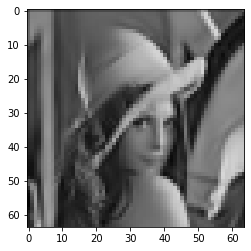

In [28]:
# read the text file output from the vivado and reconstruct the image
dsimagesize = 64 # size of the downsampled image
dsimage_vivado = np.zeros((dsimagesize, dsimagesize))
with open('/output.txt', 'r') as imgfile:
    lines = imgfile.readlines()
    line = 0
    for row in range(dsimagesize):
        for col in range(dsimagesize):
            pixel_val =  int(lines[line].split('\n')[0][-8:], 2)
            # print(pixel_val)
            dsimage_vivado[col, row] = pixel_val
            line += 1

# visualise the image
fig, ax = plt.subplots()
ax.imshow(dsimage_vivado, cmap='gray', vmin = 0, vmax = 255)
plt.show()

In [29]:
# Mean Squared Error between the generated images by two methods
mse = (np.square(dsimage_algo - dsimage_vivado)).mean(axis=None)
print("Mean Squared Error = {}".format(mse))

Mean Squared Error = 0.0


## Python Script for downsampling a dummy image used in the debugging state

This script was used to test the downsampling algorithm that was implemented inside the custom processor.

In [ ]:
# DUMMY IMAGE FOR DEBUGGLING
image = [128, 100, 100, 140, 
        150, 80, 60, 50,
        10, 80, 50, 98,
        150, 180, 200, 125]

# properties of the original image
image_width  = 4; # width of the image
image_height = 4; # height of the image

# properties of the downsampled image
dsimage_width  = 2; # width of the downsampled image
dsimage_height = 2; # height of the downsampled image

# downsampled image
downsampledimage = [0] * dsimage_width * dsimage_height; # variable to store downsampled image

# write the binary representation of the image pixels to a txt file
ram_index = 20
with open('/dummy_img.txt', 'w') as imgfile:    
    for pixel in image:
            imgfile.write("ram[{}] = 8'b{:08b};\n".format(ram_index, pixel))
            ram_index += 1   


# printing the original image
print("Original Image")
for row in range(image_height):
        for col in range(image_width):
                index= row*image_width + col
                print("{:08b}, ".format(int(image[index])), end = " ")
        print("")

# Horizontal Convolution
print("\nHorizontal Convolution")
height_count = image_height;    
x = 0
while (height_count > 0):
        y = 0
        a = 0 # zero padding(left)
        b = 2 * image[x*image_width + y]
        width_count = image_width - 1

        while (width_count > 0):
                c = image[x*image_width + y + 1]
                new_pixel = (a + b + c)/4
                image[x*image_width + y] = int(new_pixel); 
                # print("{}, ".format(int(new_pixel)), end = " ")
                # sliding window
                a = b/2
                b = c*2
                y += 1; # moving to next pixel
                width_count -= 1
          
        c = 0; # zero padding(right)
        new_pixel = (a + b + c)/4
        image[x*image_width + y] = int(new_pixel)
        # print("{}, ".format(int(new_pixel)), end = " ")
        x += 1; # moving to next row
        height_count -= 1
        # print("")

# visualization
for row in range(image_height):
        for col in range(image_width):
                index= row*image_width + col
                print("{:08b}, ".format(int(image[index])), end = " ")
        print("")

# Vertical Convolution
print("\nVertical Convolution")
width_count = image_width
y = 0
while (width_count > 0):
        x = 0
        a = 0 # zero padding(top)
        b = 2*image[x*image_width + y]
        height_count = image_height - 1

        while (height_count > 0):
                c = image[x*image_width + image_width + y]
                new_pixel = (a + b + c)/4
                image[x*image_width + y] = int(new_pixel)
                # print("{}, ".format(int(new_pixel)), end = " ")
                # sliding window
                a = b/2
                b = c*2
                x += 1 # moving to next pixel
                height_count -= 1;       

        c = 0 # zero padding(bottom)
        new_pixel = (a + b + c)/4
        image[x*image_width + y] = int(new_pixel)
        # print("{}, ".format(int(new_pixel)), end = " ")
        y += 1 #  moving to next column
        width_count -= 1
        # print("")

# visualization
for row in range(image_height):
        for col in range(image_width):
                index= row*image_width + col
                print("{:08b}, ".format(int(image[index])), end = " ")
        print("")

#  downsampling
print("\nDownsampling")
height_count = image_height/2 #  dsimage_height;
x = 0
while (height_count > 0):  
        y = 0
        width_count = image_width/2; #  dsimage_width

        while (width_count > 0):
                pixel_value = image[2 * (y*image_width + x)]
                downsampledimage[int(x* (image_width/2) + y)] = int(pixel_value)            
                print("{:08b}, ".format(int(pixel_value)), end = " ")
                y += 1; #  moving to next pixel
                width_count -= 1;            

        x += 1; #  moving to next  row 
        height_count -= 1
        print("")


Original Image
10000000,  01100100,  01100100,  10001100,  
10010110,  01010000,  00111100,  00110010,  
00001010,  01010000,  00110010,  01100010,  
10010110,  10110100,  11001000,  01111101,  

Horizontal Convolution
01011001,  01101011,  01101110,  01011111,  
01011111,  01011100,  00111110,  00101000,  
00011001,  00110111,  01000101,  00111101,  
01111000,  10110001,  10110000,  01110000,  

Vertical Convolution
01000100,  01001100,  01000110,  00111001,  
01001100,  01010110,  01001011,  00111011,  
01000010,  01011110,  01011110,  01000100,  
01000010,  01100110,  01101001,  01000111,  

Downsampling
01000100,  01000010,  
01000110,  01011110,  
